## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import plotly.express as px

df = pd.read_csv('data.csv')
df_w_genres = pd.read_csv('data_w_genres.csv')
df_year = pd.read_csv('data_by_year.csv')
df_by_genres = pd.read_csv('data_by_genres.csv')
df_artist = pd.read_csv('data_by_artist.csv')

## Look at correlations

In [2]:
df.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


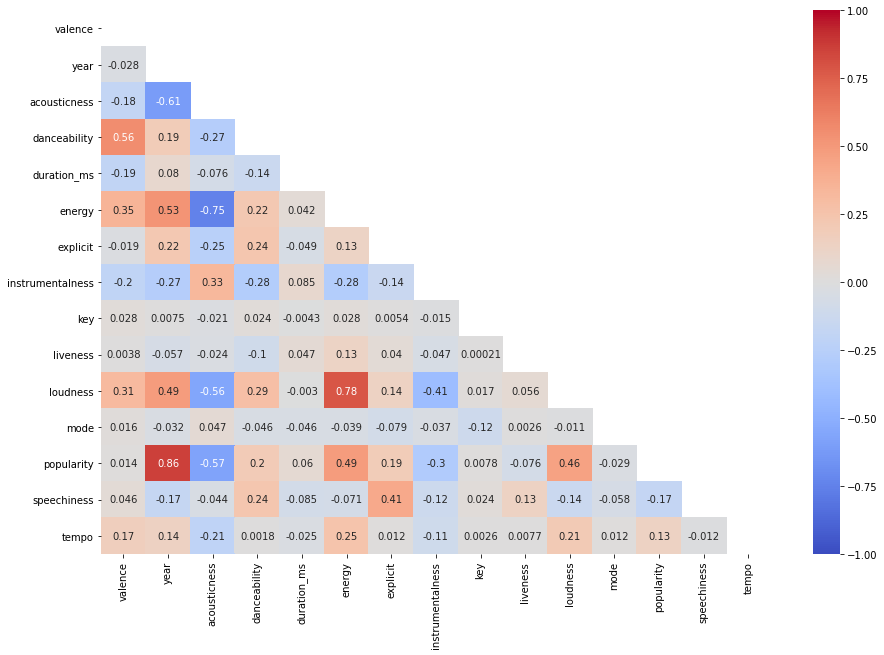

In [3]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

### Of all the metrics contained in this table, popularity is probably the most interesting as a dependent variable. It may be interesting to augment this popularity rating with other metrics - how else could we quantify a song being "popular"? 
- Number of plays
- Landing on the Billboard Top 100 charts
- Prominence in pop culture (harder to quantify, but I can imagine something like "propensity to be played at parties", so perhaps volume at which the song is played)

#### Let's start with a simple one and bring in the Billboard Top 100 Chart for every week 

In [4]:
# import requests
# from bs4 import BeautifulSoup
# r = requests.get('https://www.billboard.com/charts/year-end/top-hummed')
# soup = BeautifulSoup(r.text, 'html.parser')
# soup.findAll("span", {"class_": "chart-element__information__song text--truncate color--primary"})

## Modify/simplify genres

In [5]:
print('len before: ', len(df_w_genres))
df_w_genres = df_w_genres[df_w_genres['genres'] !='[]']
print('len after: ', len(df_w_genres))

len before:  28680
len after:  18823


In [7]:
df_w_genres.reset_index(drop=True, inplace=True)
df_w_genres['genre_summary'] = df_w_genres['genres'].copy()
df_w_genres['genre_summary'] = df_w_genres['genres'].apply(lambda x: ast.literal_eval(x)[0].split(' ')[-1])

df_w_genres = df_w_genres[df_w_genres['genre_summary'] != 'music']
df_w_genres = df_w_genres[df_w_genres['genre_summary'] != 'band']
df_w_genres = df_w_genres[df_w_genres['genre_summary'] != 'corrido']
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['hop'],'hip hop')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['standards'],'jazz')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['performance'],'classical')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['folk'],'folk music')
df_w_genres['genre_summary'] = df_w_genres['genre_summary'].replace(['tunes'],'show tunes')

values = df_w_genres['genre_summary'].value_counts()
df_w_genres['genre_summary_num'] = df_w_genres['genre_summary'].apply(lambda x: values[x])
pd.set_option('display.max_rows', 1000)
df_w_genres = df_w_genres[df_w_genres['genre_summary_num'] > 500]
df_w_genres.drop(columns=['genres', 'genre_summary_num'], inplace=True)
df_w_genres.reset_index(inplace=True, drop=True)

In [9]:
# df.head()
# df_w_genres.head()
# df_year.head()
# df_by_genres.head()
# df_artist.head()

In [40]:
pd.set_option('display.max_columns', None)
grouped = df_w_genres.groupby('genre_summary').aggregate(['mean'])
grouped.columns = grouped.columns.get_level_values(0)
grouped.reset_index(inplace=True)
grouped.head(1)

,genre_summary,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,blues,0.583444,0.584681,218139.096291,0.462482,0.106723,0.201068,-11.36178,0.066793,117.540331,0.639181,28.93812,5.219828,0.818966,22.064655


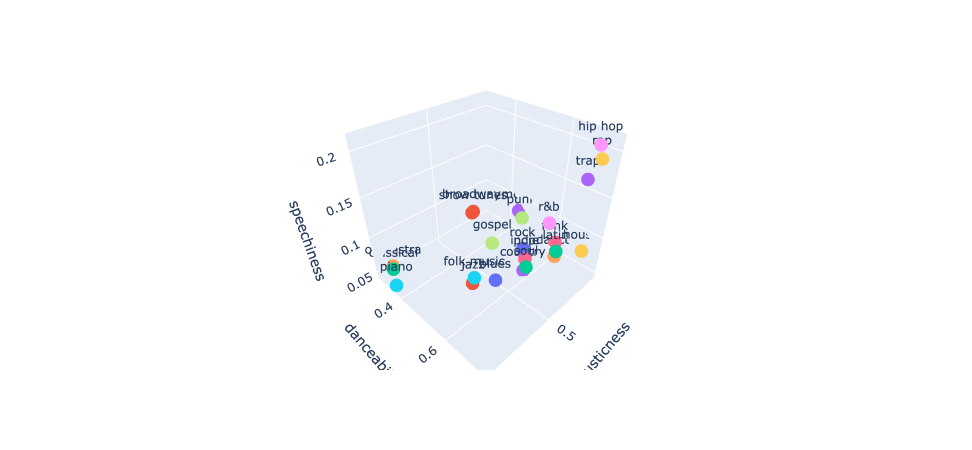

In [41]:
fig = px.scatter_3d(grouped, x='acousticness', y='danceability',  z='speechiness',color='genre_summary', text='genre_summary')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

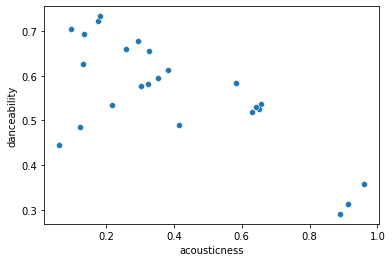

In [78]:
sns.scatterplot(x=grouped['acousticness'], y=grouped['danceability']);

# Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split
X = df_w_genres[['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']]
# X = df_w_genres[['acousticness', 'danceability', 'duration_ms', 'loudness', 'speechiness', 'tempo', 'valence']]
y = df_w_genres['genre_summary']
# X_train, X_test, y_train, y_test = train_test_split(X_simple, y, random_state=124)

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10_000)
# logreg.fit(X_train, y_train)
logreg.fit(X, y)
preds = logreg.predict(X)
logreg.score(X, y)

0.21560693641618497

## Predicted

In [73]:
(unique, counts) = np.unique(preds, return_counts=True)
np.asarray((unique, counts)).T

array([['classical', 262],
       ['pop', 7708],
       ['rock', 2410]], dtype=object)

## Actual

In [74]:
(unique, counts) = np.unique(y_test, return_counts=True)
np.asarray((unique, counts)).T

array([['blues', 63],
       ['broadway', 41],
       ['classical', 118],
       ['country', 141],
       ['dance', 64],
       ['folk music', 82],
       ['funk', 49],
       ['gospel', 33],
       ['hip hop', 177],
       ['house', 45],
       ['indie', 70],
       ['jazz', 153],
       ['latin', 50],
       ['metal', 111],
       ['orchestra', 46],
       ['piano', 37],
       ['pop', 547],
       ['punk', 43],
       ['r&b', 41],
       ['rap', 170],
       ['rock', 380],
       ['show tunes', 27],
       ['soul', 69],
       ['trap', 38]], dtype=object)